## INCLUDES 
1. DATA PREPROCESSING USING (tf.keras.preprocessing.image_dataset_from_directory)
2. MODEL TRAINING

In [ ]:
!unzip /content/drive/MyDrive/ASL/archive.zip

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers

####  DATALOADER FOR TRAIN DATA

In [2]:
directory = "/content/asl_alphabet_train/asl_alphabet_train"


In [5]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred", # To taKe the lables from the folder directory 
    label_mode="int",    # That lables are Categorical
    class_names=None,         #
    color_mode="grayscale",   #Conert Image to gray scale
    batch_size=16,            # Take Batch size as 16 
    image_size=(28, 28),    # Resize image into a particular size 128*128
    shuffle=True,
    subset="training",
    validation_split=0.2,  
    seed=1337,           # Shuffle for better training Performance
)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.


####  DATALOADER FOR TEST DATA

In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",      # To taKe the lables from the folder directory 
    label_mode="int", # That lables are Categorical
    class_names=None,         #
    color_mode="grayscale",   #Conert Image to gray scale
    batch_size=16,            # Take Batch size as 16 
    image_size=(28, 28),    # Resize image into a particular size 128*128
    shuffle=True,    
    subset="validation",
    validation_split=0.2,  
    seed=1337,           # Shuffle for better training Performance
)

Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


### DATA UNDERSTANDING

In [7]:
train_iter = iter(train)
X,y  = train_iter.next()

In [37]:
print("Input Batch Shape: " , X.shape)
print("Input Ground Truth Shape: " , y.shape)

Input Batch Shape:  (16, 28, 28, 1)
Input Ground Truth Shape:  (16,)


#DATA VISUALIZATION

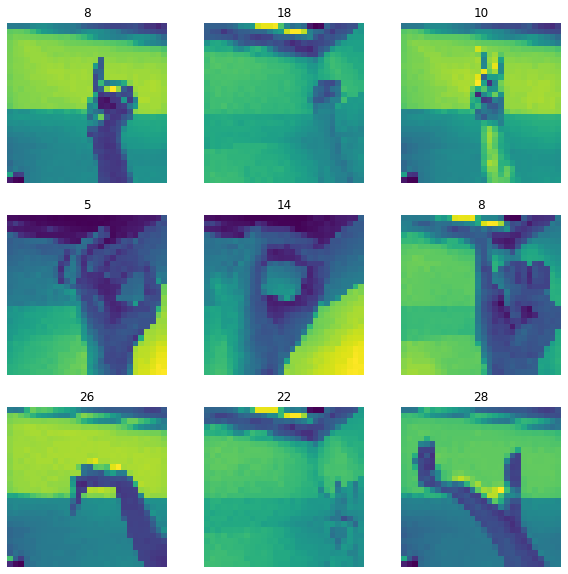

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):       
        ax = plt.subplot(3, 3, i + 1)        
        plt.imshow(images[i].numpy().astype("uint8").reshape((28, 28)))
        plt.title(int(labels[i]))        
        plt.axis("off")

## MODEL BUILDING

In [28]:
model = keras.Sequential([    
    layers.Input((28, 28, 1)),    
    layers.Conv2D(32, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),    
    layers.Dense(512, activation="relu"),    
    layers.Dropout(0.4),
    layers.Dense(256, activation="relu"),    
    layers.Dropout(0.4),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(29, activation="softmax")
])

#Compile Model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(1e-3), metrics=["accuracy"])

In [29]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                      

In [30]:
history = model.fit(train, epochs = 4 , validation_data = test_ds)



Epoch 1/4
4350/4350 [==============================] - 50s 11ms/step - loss: 1.7350 - accuracy: 0.4495 - val_loss: 0.5188 - val_accuracy: 0.8176
Epoch 2/4
4350/4350 [==============================] - 48s 11ms/step - loss: 0.5223 - accuracy: 0.8279 - val_loss: 0.7435 - val_accuracy: 0.7812
Epoch 3/4
4350/4350 [==============================] - 49s 11ms/step - loss: 0.3110 - accuracy: 0.9042 - val_loss: 0.1049 - val_accuracy: 0.9641
Epoch 4/4
4350/4350 [==============================] - 49s 11ms/step - loss: 0.2356 - accuracy: 0.9319 - val_loss: 0.0737 - val_accuracy: 0.9776


## PLOTTING THE RESULTS

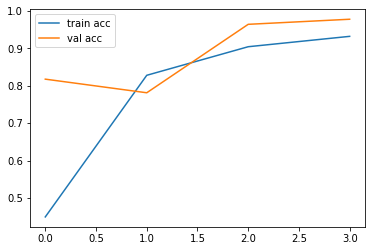

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

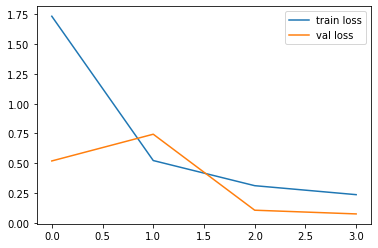

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

## Prediction

Text(0.5, 1.0, 'Predicted Result 25')

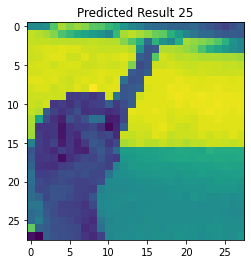

In [33]:
path = "/content/asl_alphabet_test/asl_alphabet_test/Z_test.jpg"
image_size=(28, 28)
img = keras.preprocessing.image.load_img( path ,  color_mode="grayscale" ,  target_size=image_size)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
result = str(np.argmax(predictions))


plt.imshow(img_array.numpy().astype("uint8").reshape((28, 28)))
plt.title("Predicted Result " + result )

### SAVING THE MODEL

In [34]:
from keras.models import load_model
model.save("model2.h5")
loaded_model = load_model("model2.h5")


Text(0.5, 1.0, 'Predicted Result 25')

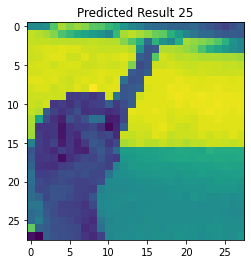

In [35]:
path = "/content/asl_alphabet_test/asl_alphabet_test/Z_test.jpg"
image_size=(28, 28)
img = keras.preprocessing.image.load_img( path ,  color_mode="grayscale" ,  target_size=image_size)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = loaded_model.predict(img_array)
result = str(np.argmax(predictions))


plt.imshow(img_array.numpy().astype("uint8").reshape((28, 28)))
plt.title("Predicted Result " + result )